SECOND APRROACH
TOP_10 FEATURES

 Gradient Boosting (Top 10 Features)
R²   (R-squared):              -0.3465
MSE  (Mean Squared Error):     31494070726135.64
MAPE (Mean Absolute % Error):  53.45%

 Polynomial Regression (Top 10 Poly Features)
R²   (R-squared):              -0.2484
MSE  (Mean Squared Error):     29201264966607.94
MAPE (Mean Absolute % Error):  64.04%


 Linear Regression (Top 10 Features)
R²   (R-squared):              -0.0828
MSE  (Mean Squared Error):     25326243498874.31
MAPE (Mean Absolute % Error):  50.32%

 Random Forest (Top 10 Features)
R²   (R-squared):              -0.1216
MSE  (Mean Squared Error):     26235273674602.96
MAPE (Mean Absolute % Error):  48.95%


 XGBoost (Top 10 Features)
R²   (R-squared):              -0.2599
MSE  (Mean Squared Error):     29468629201818.11
MAPE (Mean Absolute % Error):  45.48%

Train the model using all features to get the importances
Then select the top 10 features based on importance
Retrain the model using only those top 10 features
Evaluate again with clean metrics


Top 10 Feature Importances:
AgeClass_2.1: 0.4874
Total_Returns: 0.1587
AgeClass_2.4: 0.0952
AgeClass_1.2: 0.0350
AgeClass_2.3: 0.0339
AgeClass_3.3: 0.0281
River_Kvichak: 0.0247
AgeClass_3.2: 0.0208
AgeClass_1.3: 0.0176
AgeClass_1.1: 0.0175


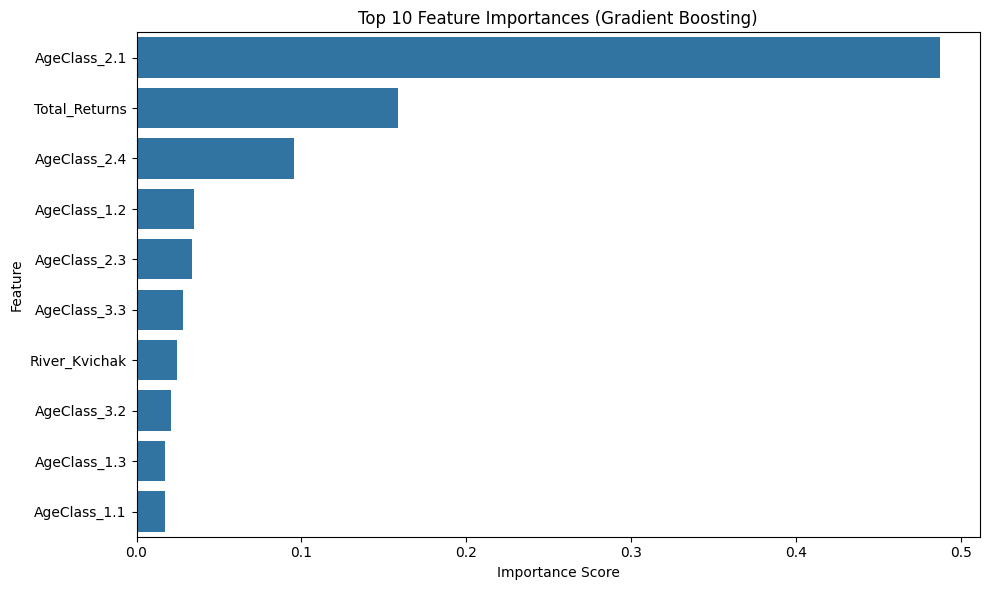


 Gradient Boosting (Top 10 Features)
R²   (R-squared):              -0.3465
MSE  (Mean Squared Error):     31494070726135.64
MAPE (Mean Absolute % Error):  53.45%


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load datasets
train_loaded = pd.read_csv(train_path)
test_loaded = pd.read_csv(test_path)


X_train = train_loaded.drop('Total_Returns_NextYear', axis=1)
y_train = train_loaded['Total_Returns_NextYear']

X_test = test_loaded.drop('Total_Returns_NextYear', axis=1)
y_test = test_loaded['Total_Returns_NextYear']

#Step 1: Train initial model with all features
gbr_full  = GradientBoostingRegressor(
    n_estimators=200, 
    learning_rate=0.05, 
    max_depth=4, 
    random_state=42
)

#  Train the model
gbr_full.fit(X_train, y_train)

# Step 2: Extract top 10 features
feature_importances = pd.Series(gbr_full.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)
top_10_features = top_features.head(10).index.tolist()

# Print and plot feature importances
print("\nTop 10 Feature Importances:")
for feature in top_10_features:
    print(f"{feature}: {top_features[feature]:.4f}")

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.head(10).values, y=top_10_features)
plt.title("Top 10 Feature Importances (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#Step 3: Retrain using only top 10 features

X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

gbr_top10 = GradientBoostingRegressor(
    n_estimators=200, 
    learning_rate=0.05, 
    max_depth=4, 
    random_state=42
)
gbr_top10.fit(X_train_top10, y_train)

#Step 4: Predict and evaluate
y_pred = gbr_top10.predict(X_test_top10)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\n Gradient Boosting (Top 10 Features)")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

# 🔹 Step 1: Train using ALL features (poly degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
feature_names = poly.get_feature_names_out(X_train.columns)

model_full = LinearRegression()
model_full.fit(X_train_poly, y_train)

# 🔹 Step 2: Evaluate full model
y_pred_full = model_full.predict(X_test_poly)
r2_full = r2_score(y_test, y_pred_full)
mse_full = mean_squared_error(y_test, y_pred_full)
mape_full = np.mean(np.abs((y_test - y_pred_full) / y_test)) * 100

print("\n📊 Polynomial Regression (All Features)")
print(f"R²   (R-squared):              {r2_full:.4f}")
print(f"MSE  (Mean Squared Error):     {mse_full:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape_full:.2f}%")

# 🔹 Step 3: Get top 10 features by absolute coefficient
coef_series = pd.Series(np.abs(model_full.coef_), index=feature_names)
top_10_poly_features = coef_series.sort_values(ascending=False).head(10)
print("\n🔝 Top 10 Most Influential Polynomial Features:")
print(top_10_poly_features)

# 🔹 Step 4: Filter polynomial features to only top 10
top_10_indices = [list(feature_names).index(f) for f in top_10_poly_features.index]

X_train_top10 = X_train_poly[:, top_10_indices]
X_test_top10 = X_test_poly[:, top_10_indices]

# 🔹 Step 5: Retrain with top 10 polynomial features
model_top10 = LinearRegression()
model_top10.fit(X_train_top10, y_train)

# 🔹 Step 6: Evaluate retrained model
y_pred_top10 = model_top10.predict(X_test_top10)
r2_top10 = r2_score(y_test, y_pred_top10)
mse_top10 = mean_squared_error(y_test, y_pred_top10)
mape_top10 = np.mean(np.abs((y_test - y_pred_top10) / y_test)) * 100

print("\n Polynomial Regression (Top 10 Poly Features)")
print(f"R²   (R-squared):              {r2_top10:.4f}")
print(f"MSE  (Mean Squared Error):     {mse_top10:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape_top10:.2f}%")



📊 Polynomial Regression (All Features)
R²   (R-squared):              -357290.7747
MSE  (Mean Squared Error):     8357134698325957632.00
MAPE (Mean Absolute % Error):  5704.72%

🔝 Top 10 Most Influential Polynomial Features:
AgeClass_0.2 sss_mayaug        1517.271530
Year River_Kvichak             1008.744925
AgeClass_2.4 River_Kvichak      819.899399
AgeClass_0.2 River_Wood         788.380195
AgeClass_0.4 River_Nushagak     736.610706
AgeClass_2.4 River_Igushik      680.760055
AgeClass_0.3 River_Kvichak      644.132782
AgeClass_0.2 River_Ugashik      643.012375
AgeClass_1.1 River_Kvichak      602.011589
Year sss_mayaug                 585.542301
dtype: float64

 Polynomial Regression (Top 10 Poly Features)
R²   (R-squared):              -0.2484
MSE  (Mean Squared Error):     29201264966607.94
MAPE (Mean Absolute % Error):  64.04%



📊 Linear Regression (All Features)
R²   (R-squared):              -0.1660
MSE  (Mean Squared Error):     27271938218871.29
MAPE (Mean Absolute % Error):  53.20%

🔝 Top 10 Most Influential Features:
River_Kvichak: 2648177.3542
River_Igushik: -1341600.4109
River_Egegik: 1020593.8011
sss_mayaug: -1009081.5910
River_Alagnak: -993085.9482
pdo_mean_DecMar: 750036.4465
River_Nushagak: -641889.6586
npi_mean_NovMar: 464332.8990
ao_mean_DecMar: 460574.0186
River_Ugashik: -336059.0077


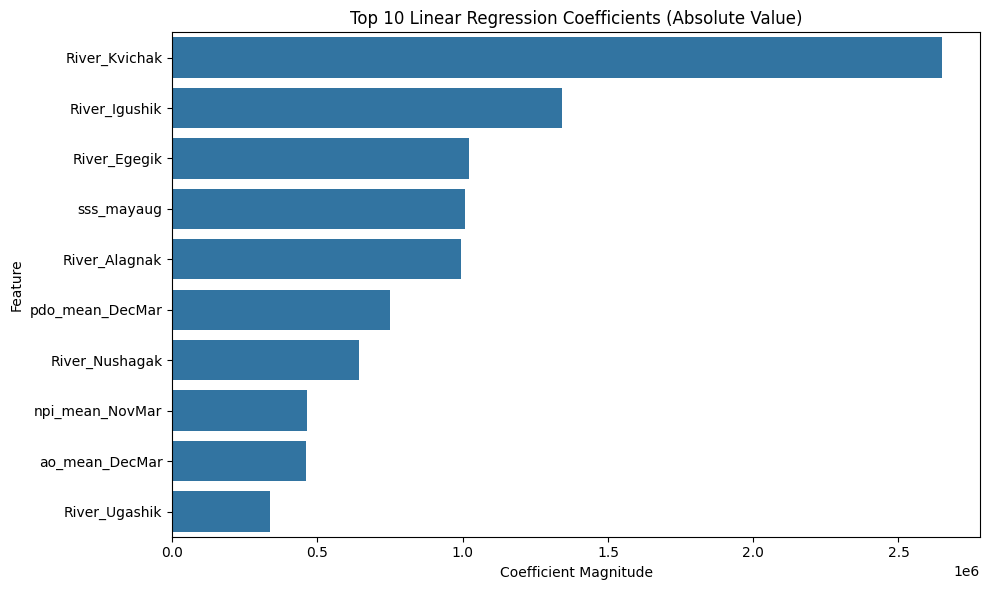


 Linear Regression (Top 10 Features)
R²   (R-squared):              -0.0828
MSE  (Mean Squared Error):     25326243498874.31
MAPE (Mean Absolute % Error):  50.32%


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load data
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train_full = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test_full = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

# 🔹 Step 1: Train on all features
model_full = LinearRegression()
model_full.fit(X_train_full, y_train)

# 🔹 Step 2: Evaluate full model
y_pred_full = model_full.predict(X_test_full)
r2_full = r2_score(y_test, y_pred_full)
mse_full = mean_squared_error(y_test, y_pred_full)
mape_full = np.mean(np.abs((y_test - y_pred_full) / y_test)) * 100

print("\n📊 Linear Regression (All Features)")
print(f"R²   (R-squared):              {r2_full:.4f}")
print(f"MSE  (Mean Squared Error):     {mse_full:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape_full:.2f}%")

# 🔹 Step 3: Get top 10 features by coefficient magnitude
coefs = pd.Series(model_full.coef_, index=X_train_full.columns)
top_10_features = coefs.abs().sort_values(ascending=False).head(10).index.tolist()

print("\n🔝 Top 10 Most Influential Features:")
for feature in top_10_features:
    print(f"{feature}: {coefs[feature]:.4f}")

# Optional plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coefs[top_10_features].abs().values, y=top_10_features)
plt.title("Top 10 Linear Regression Coefficients (Absolute Value)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 🔹 Step 4: Retrain using only top 10 features
X_train_top10 = X_train_full[top_10_features]
X_test_top10 = X_test_full[top_10_features]

model_top10 = LinearRegression()
model_top10.fit(X_train_top10, y_train)

# 🔹 Step 5: Evaluate top 10 model
y_pred_top10 = model_top10.predict(X_test_top10)
r2_top10 = r2_score(y_test, y_pred_top10)
mse_top10 = mean_squared_error(y_test, y_pred_top10)
mape_top10 = np.mean(np.abs((y_test - y_pred_top10) / y_test)) * 100

print("\n Linear Regression (Top 10 Features)")
print(f"R²   (R-squared):              {r2_top10:.4f}")
print(f"MSE  (Mean Squared Error):     {mse_top10:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape_top10:.2f}%")



📊 Random Forest (All Features)
R²   (R-squared):              -0.2373
MSE  (Mean Squared Error):     28941047083640.40
MAPE (Mean Absolute % Error):  49.48%

🔝 Top 10 Feature Importances:
AgeClass_2.1     0.530038
Total_Returns    0.218456
AgeClass_1.2     0.023100
AgeClass_1.1     0.019392
AgeClass_3.3     0.019134
River_Kvichak    0.018738
AgeClass_2.4     0.017662
AgeClass_2.3     0.014950
sss_mayaug       0.014091
AgeClass_1.3     0.012343
dtype: float64


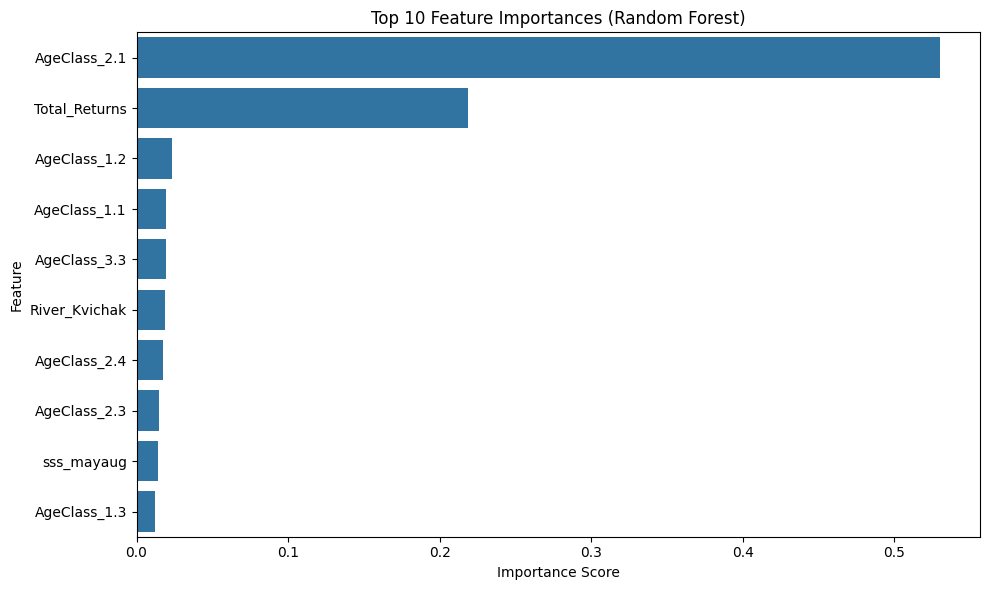


 Random Forest (Top 10 Features)
R²   (R-squared):              -0.1216
MSE  (Mean Squared Error):     26235273674602.96
MAPE (Mean Absolute % Error):  48.95%


In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# File paths (using all features here, not pre-filtered TOP_10)
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train_full = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test_full = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

# 🔹 Step 1: Train using ALL features
rf_full = RandomForestRegressor(n_estimators=100, random_state=42)
rf_full.fit(X_train_full, y_train)

# 🔹 Step 2: Evaluate full model
y_pred_full = rf_full.predict(X_test_full)
r2_full = r2_score(y_test, y_pred_full)
mse_full = mean_squared_error(y_test, y_pred_full)
mape_full = np.mean(np.abs((y_test - y_pred_full) / y_test)) * 100

print("\n📊 Random Forest (All Features)")
print(f"R²   (R-squared):              {r2_full:.4f}")
print(f"MSE  (Mean Squared Error):     {mse_full:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape_full:.2f}%")

# 🔹 Step 3: Get top 10 features by importance
feature_importances = pd.Series(rf_full.feature_importances_, index=X_train_full.columns)
top_10_features = feature_importances.sort_values(ascending=False).head(10)

print("\n🔝 Top 10 Feature Importances:")
print(top_10_features)

# Plot top 10
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 🔹 Step 4: Retrain using only top 10 features
X_train_top10 = X_train_full[top_10_features.index]
X_test_top10 = X_test_full[top_10_features.index]

rf_top10 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_top10.fit(X_train_top10, y_train)

# 🔹 Step 5: Evaluate top 10 model
y_pred_top10 = rf_top10.predict(X_test_top10)
r2_top10 = r2_score(y_test, y_pred_top10)
mse_top10 = mean_squared_error(y_test, y_pred_top10)
mape_top10 = np.mean(np.abs((y_test - y_pred_top10) / y_test)) * 100

print("\n Random Forest (Top 10 Features)")
print(f"R²   (R-squared):              {r2_top10:.4f}")
print(f"MSE  (Mean Squared Error):     {mse_top10:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape_top10:.2f}%")



📊 XGBoost (All Features)
R²   (R-squared):              -0.1194
MSE  (Mean Squared Error):     26183788053661.45
MAPE (Mean Absolute % Error):  43.69%

🔝 Top 10 Feature Importances:
AgeClass_2.1      0.461577
River_Kvichak     0.147304
Total_Returns     0.066753
AgeClass_2.3      0.060563
AgeClass_2.4      0.043788
AgeClass_3.3      0.025528
sss_mayaug        0.019753
River_Ugashik     0.017025
ao_mean_DecMar    0.016184
River_Naknek      0.013175
dtype: float32


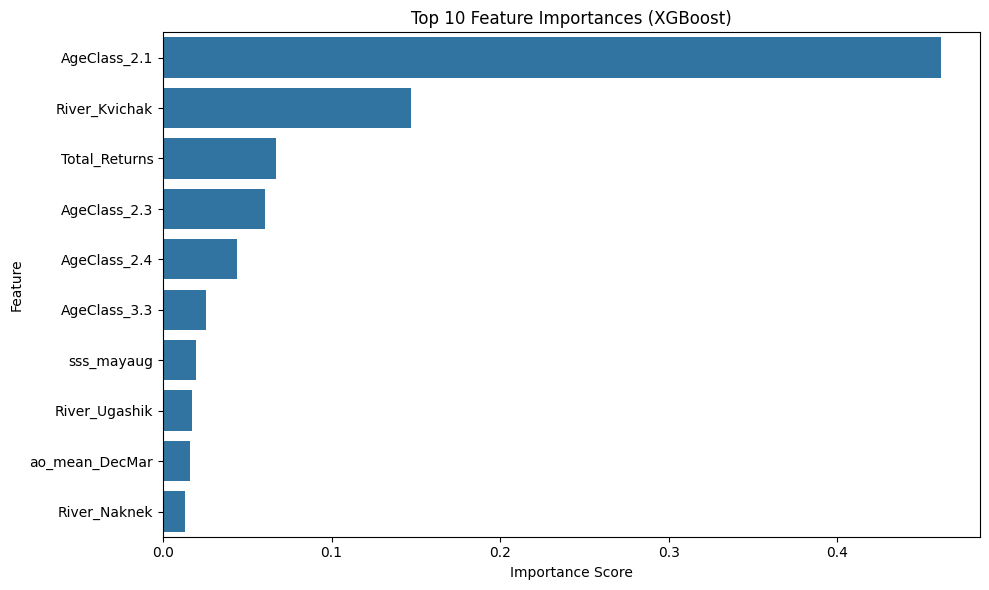


 XGBoost (Top 10 Features)
R²   (R-squared):              -0.2599
MSE  (Mean Squared Error):     29468629201818.11
MAPE (Mean Absolute % Error):  45.48%


In [5]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# File paths — using full feature set (not top_10)
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train_full = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test_full = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

# 🔹 Step 1: Train on all features
xgb_full = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_full.fit(X_train_full, y_train)

# 🔹 Step 2: Evaluate full model
y_pred_full = xgb_full.predict(X_test_full)
r2_full = r2_score(y_test, y_pred_full)
mse_full = mean_squared_error(y_test, y_pred_full)
mape_full = np.mean(np.abs((y_test - y_pred_full) / y_test)) * 100

print("\n📊 XGBoost (All Features)")
print(f"R²   (R-squared):              {r2_full:.4f}")
print(f"MSE  (Mean Squared Error):     {mse_full:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape_full:.2f}%")

# 🔹 Step 3: Get top 10 features by importance
feature_importances = pd.Series(xgb_full.feature_importances_, index=X_train_full.columns)
top_10_features = feature_importances.sort_values(ascending=False).head(10)

print("\n🔝 Top 10 Feature Importances:")
print(top_10_features)

# Plot top 10
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 🔹 Step 4: Retrain with top 10 features
X_train_top10 = X_train_full[top_10_features.index]
X_test_top10 = X_test_full[top_10_features.index]

xgb_top10 = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_top10.fit(X_train_top10, y_train)

# 🔹 Step 5: Evaluate top 10 model
y_pred_top10 = xgb_top10.predict(X_test_top10)
r2_top10 = r2_score(y_test, y_pred_top10)
mse_top10 = mean_squared_error(y_test, y_pred_top10)
mape_top10 = np.mean(np.abs((y_test - y_pred_top10) / y_test)) * 100

print("\n XGBoost (Top 10 Features)")
print(f"R²   (R-squared):              {r2_top10:.4f}")
print(f"MSE  (Mean Squared Error):     {mse_top10:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape_top10:.2f}%")
